# Face age recognition

Arturo Alatriste Trujillo.

In this notebook we will train a model to recognize if the person in the picture is male or female.





### Labels

We can create the proper label using the file name using the next layout:

```
[age]_[gender]_[race]_[date&time].jpg
```


    * [age] is an integer from 0 to 116, indicating the age
    
    * [gender] is either 0 (male) or 1 (female)
    
    * [race] is an integer from 
      0 White, 
      1 Black, 
      2 Asian, 
      3 Indian, 
      4 Others (like Hispanic, Latino, Middle Eastern).
    
    * [date&time] is in the format of yyyymmddHHMMSSFFF, showing the date and time an image was collected to UTKFace


example: 

21_1_0_20170109214656355.jpg.chip.jpg

age    = 21
gender = 1  # 1 ( female )
race   = 0  # 0 white
datetime = 2017-01-09  21:46:56355

### import libraries

In [3]:
import matplotlib.pyplot as plt
import numpy             as np
import os

import pandas            as pd

import shutil
import zipfile
from datetime             import datetime
from IPython.display      import HTML, display

In [4]:
import tensorflow as tf


'''from tensorflow                import keras
from keras                     import layers
from keras                     import Model
from keras.optimizers          import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.utils               import img_to_array, load_img
'''


2023-10-30 11:46:03.578961: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-30 11:46:03.817347: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-30 11:46:03.819238: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-30 11:46:04.885569: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


'from tensorflow                import keras\nfrom keras                     import layers\nfrom keras                     import Model\nfrom keras.optimizers          import Adam, RMSprop\nfrom keras.preprocessing.image import ImageDataGenerator\nfrom keras.utils               import img_to_array, load_img\n'

In [5]:
import tensorflow as tf

from tensorflow                import keras
from keras                     import layers
from keras                     import Model
from keras.optimizers          import Adam, RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.utils               import img_to_array, load_img


In [6]:
try:
  import google.colab
  IN_COLAB = True
except:
  IN_COLAB = False

In [7]:
# current working directory

os.getcwd()


'/home/art/git/tf/face'

### download files


!wget -O faces.tar.gz https://drive.google.com/file/d/0BxYys69jI14kRjNmM0gyVWM2bHM/view?usp=share_link&resourcekey=0-nqc2K3On6J_sCj7TGq2qLw

### decompress

tar zxvf faces.tar.gz

### prepare files

In [8]:
MIN_AGE = 0
MAX_AGE = 116

if IN_COLAB:
    data_dir  = '/content/drive/MyDrive/data/'
    train_dir = '/content/drive/MyDrive/data/crop_part1/'
else:
    data_dir  = '/home/art/data/face_age/'
    train_dir = '/home/art/data/face_age/crop_part1/'
    #train_dir = '/home/art/data/face_age/crop_part1_small/'

print( 'data_dir : {}'.format( data_dir  ) )
print( 'train_dir: {}'.format( train_dir ) )

data_dir : /home/art/data/face_age/
train_dir: /home/art/data/face_age/crop_part1/


### function get_images_labels

take as input a directory and return as output 3 list, images, age and gender.


In [9]:
def get_images_labels( my_dir ):
    images = []
    age    = []
    #gender = []

    
    #print( 'get_images_labels() ... begin' )
    
    file_names = os.listdir( my_dir )
    
    for i in file_names:
        #print( 'filename: {}'.format( i ) )
        a = i.split( '_' )
        #print( 'a: {}'.format( a ) )
       
        images.append( i )
        age.append   ( float( a[0] ) / 116.00 ) 
        #gender.append( int( a[1] ) )
        
        
        
    return images, age
    
    
    

### get image labels

In [10]:
#images, age, gender = get_images_labels( train_dir )
images, age = get_images_labels( train_dir )

In [11]:
print( train_dir ) 
print( 'images: {}'.format( len( images ) ) )
print( 'age   : {}'.format( len( age    ) )  )
#print( 'gender: {}'.format( len( gender ) )  )


/home/art/data/face_age/crop_part1/
images: 9778
age   : 9778


In [12]:
def create_table():
    table = []
    row   = []
    for i in range(0, len(images) ):
        
        # we do not need gender in this model.
        # We just need the file name and age.
        
        #g = 'male'
        #if gender[i] == 1:
        #    g = 'female'
        #row = [ images[i], age[i], g ]
        
        row = [ images[i], age[i] ]
        table.append( row )

    return table



In [13]:
table = create_table()
#columns = [ 'file_name', 'age', 'gender' ]
columns = [ 'file_name', 'age' ]


In [14]:
# explore few rows

for row in table[ 0:9 ]:
    print( row )

#print(  '\n {} '.format( table )  )

['22_0_3_20170104230122361.jpg.chip.jpg', 0.1896551724137931]
['3_1_3_20161219230106056.jpg.chip.jpg', 0.02586206896551724]
['29_1_3_20170104232524938.jpg.chip.jpg', 0.25]
['1_0_2_20161219190110523.jpg.chip.jpg', 0.008620689655172414]
['3_0_2_20161219142551561.jpg.chip.jpg', 0.02586206896551724]
['49_0_0_20170104213117085.jpg.chip.jpg', 0.4224137931034483]
['31_1_2_20170105161436755.jpg.chip.jpg', 0.2672413793103448]
['45_1_0_20170110141225753.jpg.chip.jpg', 0.3879310344827586]
['3_0_2_20161219201230500.jpg.chip.jpg', 0.02586206896551724]


In [15]:
def get_train_df( table, columns ):
    df = pd.DataFrame( table, columns= columns  )
    return df


In [16]:
train_df = get_train_df( table, columns )
display( train_df )


,file_name,age
0,22_0_3_20170104230122361.jpg.chip.jpg,0.189655
1,3_1_3_20161219230106056.jpg.chip.jpg,0.025862
2,29_1_3_20170104232524938.jpg.chip.jpg,0.250000
3,1_0_2_20161219190110523.jpg.chip.jpg,0.008621
4,3_0_2_20161219142551561.jpg.chip.jpg,0.025862
...,...,...
9773,3_0_2_20161219190020899.jpg.chip.jpg,0.025862
9774,62_0_0_20170111211200517.jpg.chip.jpg,0.534483
9775,16_1_4_20170104005411807.jpg.chip.jpg,0.137931
9776,25_0_3_20170104230516489.jpg.chip.jpg,0.215517


### select just image and age columns from dataframe

In [17]:
#train_df = train_df[ [ 'file_name', 'age' ]  ]


### set Global variables

In [18]:
class Params:
    #data_dir             = './'
    
    # data generator
    batch_size  = 32
    target_size = (150, 150)
    
    # model
    kernel_size = (3,3) # keras.layer.Conv2D()
    input_shape = (150, 150, 3) # desired input image dimentions. (width, height, channels of color)
    pool_size   = (2,2)  # keras.layer.MaxPoolSize()
    learning_rate = 0.001  # default 0.001
    
    # training
    epochs = 20
    #epochs = 5
    
    num_train_img = 9761    
    
    def __init__(self):
        self.data_dir             = data_dir
        self.train_dir            = os.path.join( self.data_dir, 'crop_part1' )
        self.train_df             = train_df
        
        #validation_dir       = './validation_crop_male_female/'
    
        #self.train_male_dir       = os.path.join( self.data_dir, 'crop_male_female', 'male'   )
        #self.train_female_dir     = os.path.join( self.data_dir, 'crop_male_female', 'female' )

        #self.validation_male_dir  = os.path.join( self.data_dir, 'validation_crop_male_female', 'male'   )
        #self.validation_female_dir= os.path.join( self.data_dir, 'validation_crop_male_female', 'female' )
        
    
    
    
    

In [19]:
params = Params()

In [20]:
# debug paths
print( 'data_dir     : ', params.data_dir )
print( 'train_dir_dir: ', params.train_dir )



data_dir     :  /home/art/data/face_age/
train_dir_dir:  /home/art/data/face_age/crop_part1


### explore files

In [21]:
train_img_names = os.listdir( params.train_dir )
print( 'train_img_names: {}'.format( train_img_names[ : 3 ] ) )


display( params.train_df )



train_img_names: ['22_0_3_20170104230122361.jpg.chip.jpg', '3_1_3_20161219230106056.jpg.chip.jpg', '29_1_3_20170104232524938.jpg.chip.jpg']


,file_name,age
0,22_0_3_20170104230122361.jpg.chip.jpg,0.189655
1,3_1_3_20161219230106056.jpg.chip.jpg,0.025862
2,29_1_3_20170104232524938.jpg.chip.jpg,0.250000
3,1_0_2_20161219190110523.jpg.chip.jpg,0.008621
4,3_0_2_20161219142551561.jpg.chip.jpg,0.025862
...,...,...
9773,3_0_2_20161219190020899.jpg.chip.jpg,0.025862
9774,62_0_0_20170111211200517.jpg.chip.jpg,0.534483
9775,16_1_4_20170104005411807.jpg.chip.jpg,0.137931
9776,25_0_3_20170104230516489.jpg.chip.jpg,0.215517


### total number of files

In [22]:
print( 'train_img_names   total images {}'.format( len( train_img_names      ) ))
print( 'params.train_df {}'.format( params.train_df.shape ) )

print( '.' )
print( 'params.train_df {}'.format( params.train_df.info() ) )




train_img_names   total images 9778
params.train_df (9778, 2)
.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9778 entries, 0 to 9777
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   file_name  9778 non-null   object 
 1   age        9778 non-null   float64
dtypes: float64(1), object(1)
memory usage: 152.9+ KB
params.train_df None


### some util functions

In [23]:
def plot_graphs(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history[f'val_{metric}'])
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, f'val_{metric}'])
    plt.show()
    

### create generators

In [24]:
# this function take as input a params object, and
# return the image data generator for training and validation data.
# 
# Params : is an instance with all the parameters, directories, batch_size, target_size. Also, we can add more
#          parameters such as augmentation parameters without modifiying the function definitions nor 
#          other dependencies.

def get_train_generator( params ):
    # training image generator
    train_datagen = ImageDataGenerator(
        rescale            = 1.0 / 255,
        
        # augmentation parameters
        width_shift_range  = 0.20,
        height_shift_range = 0.20,
        rotation_range     = 0.20,
        shear_range        = 0.20,
        zoom_range         = 0.20,
        horizontal_flip    = True
    )
    
    train_generator = train_datagen.flow_from_dataframe(
        dataframe   = params.train_df,
        directory   = params.train_dir,
        x_col='file_name',
        y_col='age',
        batch_size  = params.batch_size,
        class_mode  = 'other',
        target_size = params.target_size
    )

    return train_generator
    

In [25]:
train_generator = get_train_generator( params )

Found 9778 validated image filenames.


### callbacks

In [26]:
class MyCallback( keras.callbacks.Callback ):
    #
    def on_epoch_end( self, epoch, logs ={} ):
        if logs.get( 'accuracy' ) > 95:
            print( '\n MyCallback.on_epoch_end(), stop training, we have great accuracy! \n' )
            self.model.stop_training = True
    
callbacks = MyCallback()    
    

### trainer function

In [27]:
def train_model( model, train_generator, params, callbacks ):
    steps = params.num_train_img / params.batch_size
    
    start_time = datetime.now()

    history = model.fit(
        train_generator,
        #validation_data = val_generator,
        steps_per_epoch = steps,
        epochs          = params.epochs,
        callbacks       = callbacks
    )
    
    elapsed_time = datetime.now() - start_time
    print( 'time used for training: {}'.format( elapsed_time ) )
    
    return history
    

## Models

### create a model

In [28]:
def get_model_01( params ):
    model = keras.models.Sequential([
        
        keras.layers.Conv2D( 16, params.kernel_size, activation = 'relu', input_shape=params.input_shape ),
        keras.layers.MaxPooling2D( params.pool_size ),
        
        keras.layers.Conv2D( 32, params.kernel_size, activation = 'relu' ),
        keras.layers.MaxPooling2D( params.pool_size ),
        
        keras.layers.Conv2D( 64, params.kernel_size, activation = 'relu' ),
        keras.layers.MaxPooling2D( params.pool_size ),

        keras.layers.Conv2D( 64, params.kernel_size, activation = 'relu' ),
        keras.layers.MaxPooling2D( params.pool_size ),

        keras.layers.Conv2D( 64, params.kernel_size, activation = 'relu' ),
        keras.layers.MaxPooling2D( params.pool_size ),

        keras.layers.Flatten(),
        keras.layers.Dense( 512, activation = 'relu' ),
        keras.layers.Dense( 1 )
    ])
    
    model.summary()
    return model

### create model 01

In [29]:

model_01 = get_model_01( params )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 64)       0

2023-10-30 11:47:36.339445: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### compile model 01

In [30]:
#optimizer = RMSprop( learning_rate = params.learning_rate )

model_01.compile(
    optimizer = 'adam',
    loss      = 'mse',
    
    metrics   = [ 'accuracy' ]
    #metrics   = ['mae', 'mse']
)


### train model 01

In [368]:
history = train_model( model_01, train_generator, params, callbacks )

Epoch 1/20
305/305 [==============================] - 136s 442ms/step - loss: 0.0451 - accuracy: 0.0000e+00
Epoch 2/20
305/305 [==============================] - 132s 431ms/step - loss: 0.0375 - accuracy: 0.0000e+00
Epoch 3/20
305/305 [==============================] - 131s 428ms/step - loss: 0.0317 - accuracy: 0.0000e+00
Epoch 4/20
305/305 [==============================] - 131s 427ms/step - loss: 0.0259 - accuracy: 0.0000e+00
Epoch 5/20
305/305 [==============================] - 130s 427ms/step - loss: 0.0236 - accuracy: 0.0000e+00
Epoch 6/20
305/305 [==============================] - 132s 433ms/step - loss: 0.0211 - accuracy: 0.0000e+00
Epoch 7/20
305/305 [==============================] - 131s 428ms/step - loss: 0.0199 - accuracy: 0.0000e+00
Epoch 8/20
305/305 [==============================] - 131s 429ms/step - loss: 0.0184 - accuracy: 0.0000e+00
Epoch 9/20
305/305 [==============================] - 131s 429ms/step - loss: 0.0165 - accuracy: 0.0000e+00
Epoch 10/20
305/305 [=======

KeyboardInterrupt: 

### plot metrics

KeyError: 'val_accuracy'

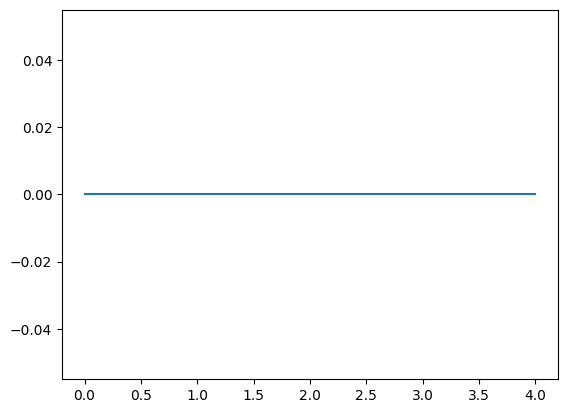

In [331]:
plot_graphs(history, "accuracy")

### save model 01

In [370]:
# model_01.save( 'model_age_01.h5' )

### load saved model

In [33]:
file_path = '/home/art/git/tf/face/model/age/model_age_01.h5'

model_01 = keras.models.load_model( file_path )

### save as tensor flow format

In [7]:
#model_01.save( filepath = 'face_age'  , save_format= 'tf' )

INFO:tensorflow:Assets written to: face_age/assets


INFO:tensorflow:Assets written to: face_age/assets


In [8]:
#model_01 = keras.models.load_model( 'face_age' )

### predictions

In [34]:
def make_prediction( model, img_path ):
    img=load_img(img_path, target_size=(150, 150))
  
    x=img_to_array(img)
    x /= 255
    x=np.expand_dims(x, axis=0)
    images = np.vstack([x])
  
    prediction = model.predict(images, batch_size=10)
    plt.imshow( img )
    plt.show()
    age = int( round( prediction[0][0] * MAX_AGE ) )
    
    print( prediction )    
    print( '{} looks like {} years old'.format(img_path, age ) )

In [35]:
# set the prediction file path

img_path = '/home/art/Pictures/faces/family/aat_01.png'


1/1 [==============================] - 0s 203ms/step


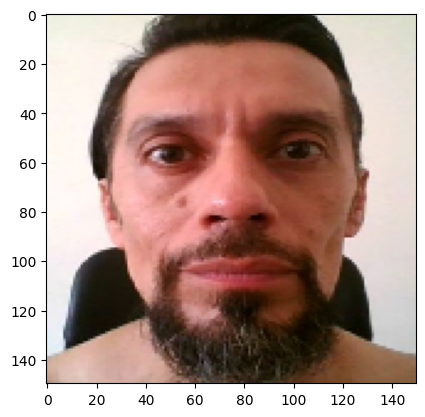

[[0.3130684]]
/home/art/Pictures/faces/family/aat_01.png looks like 36 years old


In [36]:
make_prediction( model_01, img_path )

In [37]:
def make_prediction_dir( model, src_dir ):
    file_names = os.listdir( src_dir )
    
    for i in file_names:
        img_path = os.path.join( src_dir, i )
        #print( img_path )
        try:
            make_prediction( model, img_path )
        except Exception as e:
            print( 'make_prediction_dir(), error using file: {}'.format( i ) )
    
    
    
    

1/1 [==============================] - 0s 27ms/step


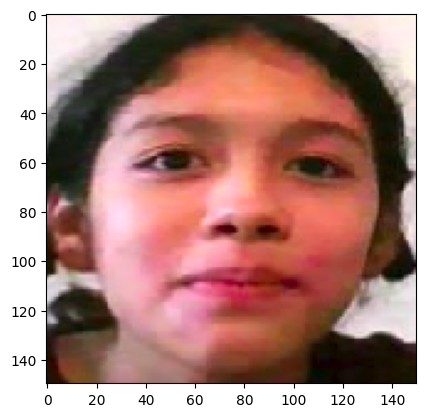

[[0.20033783]]
/home/art/Pictures/faces/family/itzy_01.png looks like 23 years old
1/1 [==============================] - 0s 27ms/step


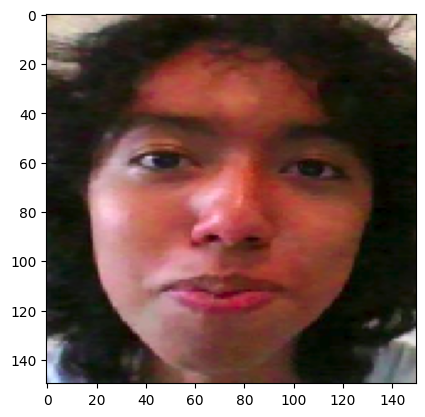

[[0.08772598]]
/home/art/Pictures/faces/family/ax_01.png looks like 10 years old
1/1 [==============================] - 0s 23ms/step


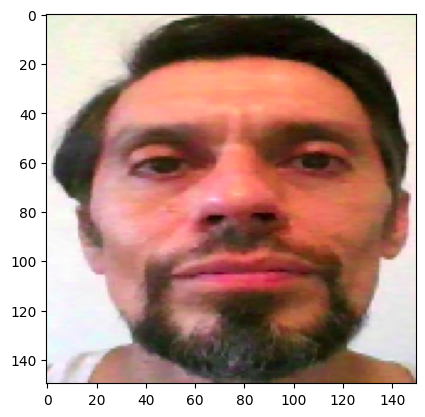

[[0.34766757]]
/home/art/Pictures/faces/family/aat_2023.png looks like 40 years old
1/1 [==============================] - 0s 26ms/step


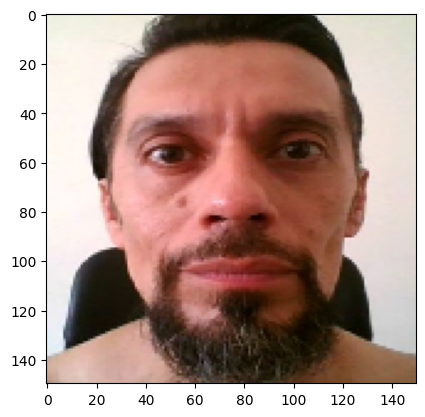

[[0.3130684]]
/home/art/Pictures/faces/family/aat_01.png looks like 36 years old
1/1 [==============================] - 0s 26ms/step


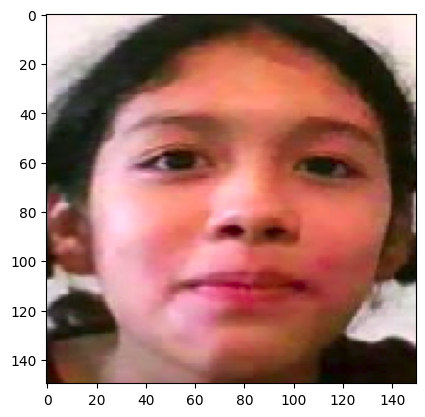

[[0.12761402]]
/home/art/Pictures/faces/family/itzy_02.png looks like 15 years old


In [38]:
img_path = '/home/art/Pictures/faces/family'
make_prediction_dir( model_01, img_path )


1/1 [==============================] - 0s 25ms/step


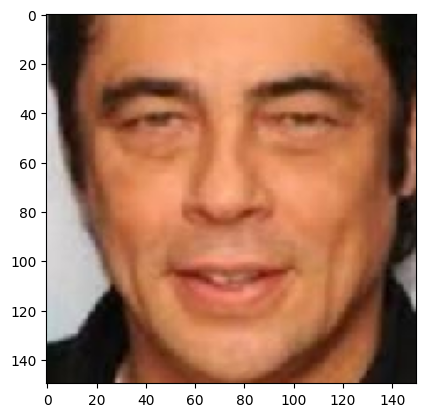

[[0.30382842]]
/home/art/Pictures/faces/age/45_0_4_20170117203301774.jpg.chip.jpg looks like 35 years old
1/1 [==============================] - 0s 25ms/step


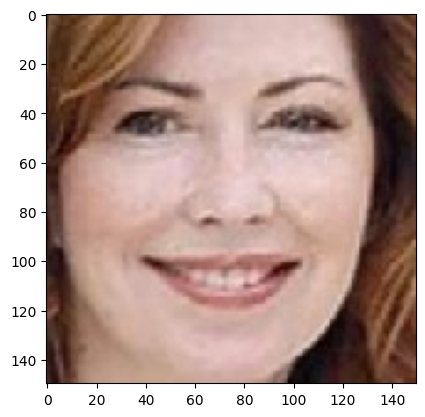

[[0.23923016]]
/home/art/Pictures/faces/age/45_1_0_20170105001254581.jpg.chip.jpg looks like 28 years old
1/1 [==============================] - 0s 22ms/step


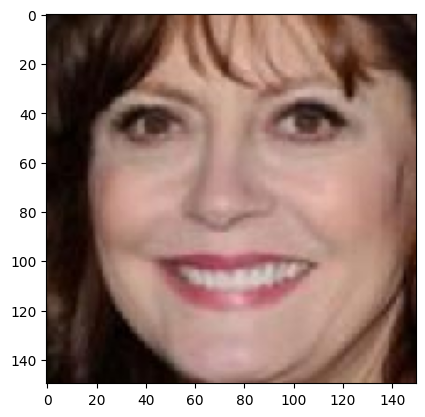

[[0.35036066]]
/home/art/Pictures/faces/age/65_1_0_20170110125326249.jpg.chip.jpg looks like 41 years old
1/1 [==============================] - 0s 23ms/step


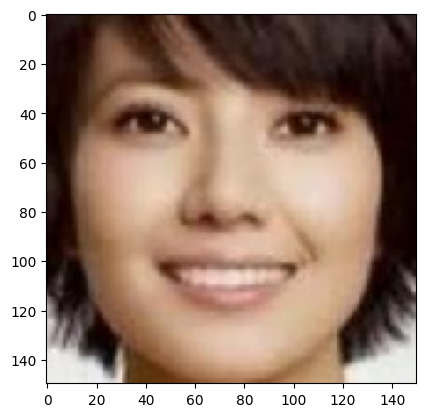

[[0.15533075]]
/home/art/Pictures/faces/age/30_1_2_20170117141055697.jpg.chip.jpg looks like 18 years old
1/1 [==============================] - 0s 23ms/step


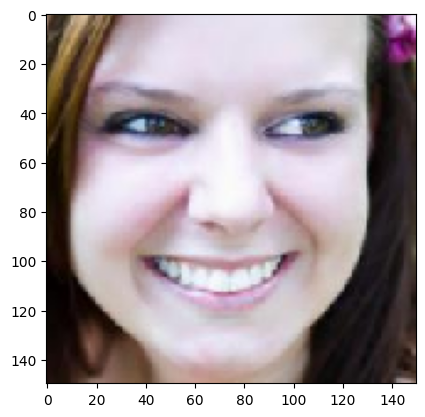

[[0.14932749]]
/home/art/Pictures/faces/age/20_1_0_20170109213459975.jpg.chip.jpg looks like 17 years old
1/1 [==============================] - 0s 25ms/step


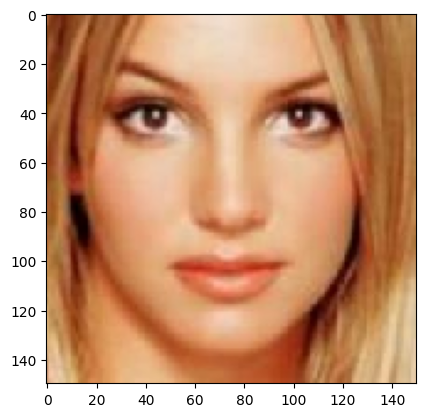

[[0.14979626]]
/home/art/Pictures/faces/age/20_1_0_20170104020801388.jpg.chip.jpg looks like 17 years old
1/1 [==============================] - 0s 25ms/step


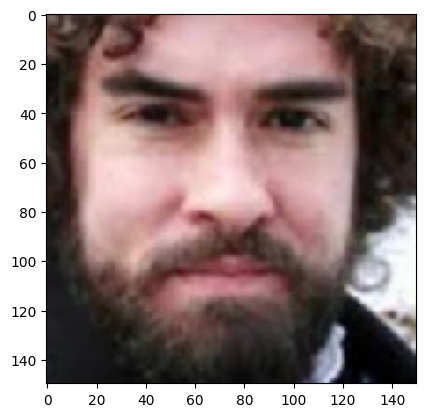

[[0.23625728]]
/home/art/Pictures/faces/age/31_0_0_20170104201545729.jpg.chip.jpg looks like 27 years old
1/1 [==============================] - 0s 27ms/step


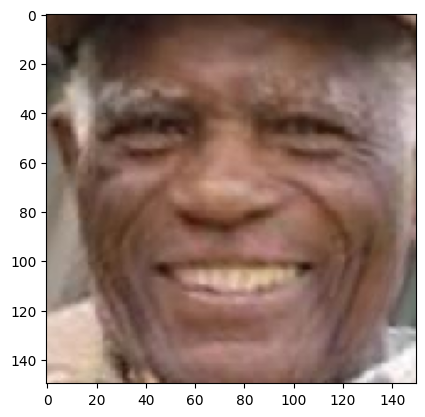

[[0.39093795]]
/home/art/Pictures/faces/age/65_0_1_20170117191610001.jpg.chip.jpg looks like 45 years old


In [39]:
img_path = '/home/art/Pictures/faces/age/'
make_prediction_dir( model_01, img_path )

## references


UTKFace
Large Scale Face Dataset 

https://susanqq.github.io/UTKFace/


#### Aligned&Cropped Faces

* crop_part1.tar.gz ( 2017-01-22 )

https://drive.google.com/file/d/0BxYys69jI14kRjNmM0gyVWM2bHM/view?usp=share_link&resourcekey=0-nqc2K3On6J_sCj7TGq2qLw
    

* UTKFace.tar.gz ( 2017-03-23 )

https://drive.google.com/file/d/0BxYys69jI14kYVM3aVhKS1VhRUk/view?usp=share_link&resourcekey=0-dabpv_3J0C0cditpiAfhAw



#### How to print tables in python notebooks

* https://stackoverflow.com/questions/35160256/how-do-i-output-lists-as-a-table-in-jupyter-notebook
    

#### VGG for keras

* https://github.com/rcmalli/keras-vggface

#### Detecting Age And Gender with TF-Lite On Android

* https://becominghuman.ai/detecting-age-and-gender-with-tf-lite-on-android-33997eed6c25

#### pyimagesearch

* https://pyimagesearch.com/2020/04/13/opencv-age-detection-with-deep-learning/

* https://pyimagesearch.com/2020/05/11/an-ethical-application-of-computer-vision-and-deep-learning-identifying-child-soldiers-through-automatic-age-and-military-fatigue-detection/    